# Association Rules 





## Background
Grocery dataset contains 9,835 transanctions from a grocery store. Each row represents one transaction, showing the items/products that were purchased in this partitucalr transaction. We will perform market basket analysis to generate association rules, and indentify the strong rules. 

In [8]:
# Load and preprocess data set 

import pandas as pd
import matplotlib.pyplot as plt

#define the path, please note you need to use your own path info for mtcars.csv to read the data
groceries = pd.read_csv('/Users/babs/Desktop/MBA/Data Mining/groceries.csv',
                        names = ['products'],sep='\t')
groceries


,products
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


In [9]:
# Turn data into a list data type where the product column is split into individual products
data = list(groceries["products"].apply(lambda x:x.split(",") ))
data

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [3]:
# preprocess data. Each column in resulting array will be tied to a given product. False/true 
# indicates if that product is within a given transaction (row)
from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder()
encoded_groceries = encoder.fit(data).transform(data)
encoded_groceries

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [4]:
# Save the array into a data frame and give the column names
df = pd.DataFrame(encoded_groceries,columns= encoder.columns_)
df


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# Turn categorical T/F to numerical 1 or 0
#df.replace(False, 0)
df.astype('int')

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#check the top items
#axis = 0 indicates column
df_items = df.sum(axis=0).to_frame(name = 'counts')
# Sort by descending order and show top 30
df_items.sort_values(by = 'counts', ascending = False).head(30)

,counts
whole milk,2513
other vegetables,1903
rolls/buns,1809
soda,1715
yogurt,1372
bottled water,1087
root vegetables,1072
tropical fruit,1032
shopping bags,969
sausage,924


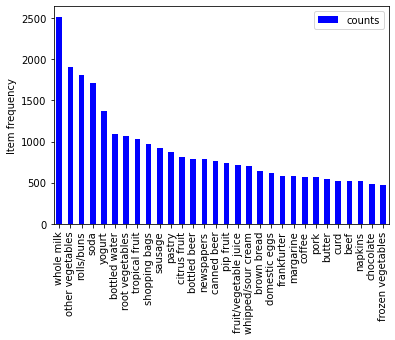

In [10]:
# Calculate frequency 

itemFrequency = df_items.sort_values(by = 'counts', ascending = False).head(30)

# and plot as histogram
ax = itemFrequency.plot.bar(color='blue')
plt.ylabel('Item frequency')
plt.show()

In [14]:
# create frequent itemsets
# Calculate support value for each itemset
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

itemsets = apriori(df, min_support=0.001, use_colnames=True)

itemsets.sort_values(by="support", ascending = False).head(20)


,support,itemsets
154,0.255516,(whole milk)
96,0.193493,(other vegetables)
115,0.183935,(rolls/buns)
130,0.174377,(soda)
155,0.139502,(yogurt)
10,0.110524,(bottled water)
116,0.108998,(root vegetables)
147,0.104931,(tropical fruit)
125,0.098526,(shopping bags)
122,0.093950,(sausage)


In [15]:
## filter specific itemsets
# Create a column called length to identify how many products are in an itemset
itemsets['length'] = itemsets['itemsets'].apply(lambda x: len(x))
itemsets


,support,itemsets,length
0,0.008033,(Instant food products),1
1,0.033452,(UHT-milk),1
2,0.003559,(abrasive cleaner),1
3,0.003254,(artif. sweetener),1
4,0.017692,(baking powder),1
...,...,...,...
13487,0.001017,"(yogurt, root vegetables, whole milk, other ve...",6
13488,0.001017,"(yogurt, root vegetables, whole milk, other ve...",6
13489,0.001322,"(yogurt, root vegetables, whole milk, other ve...",6
13490,0.001322,"(yogurt, root vegetables, tropical fruit, whol...",6


In [16]:
# You can now filter based on desired item set length and support threshold
itemsets[(itemsets['length'] == 2) & (itemsets['support'] >= 0.01) ].sort_values(by= "support", ascending = False)


,support,itemsets,length
2684,0.074835,"(whole milk, other vegetables)",2
2919,0.056634,"(rolls/buns, whole milk)",2
3135,0.056024,"(yogurt, whole milk)",2
2946,0.048907,"(whole milk, root vegetables)",2
2651,0.047382,"(other vegetables, root vegetables)",2
...,...,...,...
1855,0.010066,"(frankfurter, sausage)",2
2541,0.010066,"(tropical fruit, napkins)",2
2057,0.010066,"(fruit/vegetable juice, sausage)",2
2680,0.010066,"(other vegetables, waffles)",2


In [20]:
# and convert into rules
# Create new dataframe which will display the association rules for each item set
rules = association_rules(itemsets, metric='lift', min_threshold=1)
rules.sort_values(by=['lift'], ascending=False).head(6)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9816,(liquor),"(bottled beer, red/blush wine)",0.011083,0.004881,0.001932,0.174312,35.715787,0.001878,1.205200
9813,"(bottled beer, red/blush wine)",(liquor),0.004881,0.011083,0.001932,0.395833,35.715787,0.001878,1.636828
101204,"(yogurt, other vegetables, root vegetables)","(whole milk, tropical fruit, oil)",0.012913,0.002542,0.001017,0.078740,30.976378,0.000984,1.082711
101221,"(whole milk, tropical fruit, oil)","(yogurt, other vegetables, root vegetables)",0.002542,0.012913,0.001017,0.400000,30.976378,0.000984,1.645145
101220,"(whole milk, other vegetables, tropical fruit)","(yogurt, root vegetables, oil)",0.017082,0.001932,0.001017,0.059524,30.811404,0.000984,1.061237
101205,"(yogurt, root vegetables, oil)","(whole milk, other vegetables, tropical fruit)",0.001932,0.017082,0.001017,0.526316,30.811404,0.000984,2.075049


In [21]:
# Display all rules where support is greater than 0.01 and lift is greater than 1.2
rules[(rules['support'] > 0.01) &(rules['lift'] > 1.2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
318,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
319,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
340,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337
341,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329
342,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
...,...,...,...,...,...,...,...,...,...
45709,"(yogurt, whipped/sour cream)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
45710,"(whole milk, whipped/sour cream)",(yogurt),0.032232,0.139502,0.010880,0.337539,2.419607,0.006383,1.298943
45711,(yogurt),"(whole milk, whipped/sour cream)",0.139502,0.032232,0.010880,0.077988,2.419607,0.006383,1.049627
45712,(whole milk),"(yogurt, whipped/sour cream)",0.255516,0.020742,0.010880,0.042579,2.052747,0.005580,1.022807


In [22]:
# filter to get rules with single consequents only
rules[[len(c) == 1 for c in rules.consequents]].sort_values(by=['lift'], ascending=False).head(6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9813,"(bottled beer, red/blush wine)",(liquor),0.004881,0.011083,0.001932,0.395833,35.715787,0.001878,1.636828
5435,"(soda, hamburger meat)",(Instant food products),0.005796,0.008033,0.001220,0.210526,26.209194,0.001174,1.256492
34592,"(ham, white bread)",(processed cheese),0.005084,0.016573,0.001932,0.380000,22.928221,0.001848,1.586172
98746,"(yogurt, whole milk, other vegetables, root ve...",(rice),0.007829,0.007626,0.001322,0.168831,22.139394,0.001262,1.193950
9812,"(bottled beer, liquor)",(red/blush wine),0.004677,0.019217,0.001932,0.413043,21.493559,0.001842,1.670963
5434,"(soda, Instant food products)",(hamburger meat),0.001932,0.033249,0.001220,0.631579,18.995654,0.001156,2.624040


In [23]:
# filter the rules that have consequents as "rolls/buns"
consequent_sele = rules['consequents'] == {'rolls/buns'}
# loc allows access to group of rows and columns by label
rules.loc[consequent_sele].sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
39481,"(newspapers, spread cheese)",(rolls/buns),0.001627,0.183935,0.001220,0.750000,4.077529,9.208990e-04,3.264260
90104,"(yogurt, tropical fruit, beef, whole milk)",(rolls/buns),0.001932,0.183935,0.001322,0.684211,3.719851,9.664704e-04,2.584206
94154,"(pastry, citrus fruit, whole milk, whipped/sou...",(rolls/buns),0.001525,0.183935,0.001017,0.666667,3.624470,7.362457e-04,2.448195
59057,"(candy, soda, chocolate)",(rolls/buns),0.001932,0.183935,0.001220,0.631579,3.433709,8.647927e-04,2.215034
46672,"(beef, frankfurter, root vegetables)",(rolls/buns),0.001627,0.183935,0.001017,0.625000,3.397941,7.175436e-04,2.176174
...,...,...,...,...,...,...,...,...,...
75479,"(fruit/vegetable juice, other vegetables, trop...",(rolls/buns),0.006609,0.183935,0.001220,0.184615,1.003699,4.497183e-06,1.000835
83680,"(shopping bags, other vegetables, root vegetab...",(rolls/buns),0.006609,0.183935,0.001220,0.184615,1.003699,4.497183e-06,1.000835
29346,"(domestic eggs, root vegetables)",(rolls/buns),0.014337,0.183935,0.002644,0.184397,1.002513,6.626883e-06,1.000567
4781,(pip fruit),(rolls/buns),0.075648,0.183935,0.013930,0.184140,1.001114,1.549719e-05,1.000251


In [24]:
# If customers purchased rolls/buns, how likely they would purchase other items together?
antecedents_sele = rules['antecedents'] == {'rolls/buns'}
# Sort by confidence association rule (predictive power)
rules.loc[antecedents_sele].sort_values(by=['confidence'], ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5032,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4542,(rolls/buns),(other vegetables),0.183935,0.193493,0.042603,0.231620,1.197047,0.007013,1.049620
5002,(rolls/buns),(soda),0.183935,0.174377,0.038332,0.208402,1.195124,0.006258,1.042983
5035,(rolls/buns),(yogurt),0.183935,0.139502,0.034367,0.186844,1.339363,0.008708,1.058220
4988,(rolls/buns),(sausage),0.183935,0.093950,0.030605,0.166390,1.771048,0.013324,1.086899
5022,(rolls/buns),(tropical fruit),0.183935,0.104931,0.024606,0.133776,1.274886,0.005305,1.033299
4984,(rolls/buns),(root vegetables),0.183935,0.108998,0.024301,0.132117,1.212101,0.004252,1.026638
774,(rolls/buns),(bottled water),0.183935,0.110524,0.024199,0.131564,1.190373,0.003870,1.024228
4675,(rolls/buns),(pastry),0.183935,0.088968,0.020946,0.113875,1.279956,0.004581,1.028108
4383,(rolls/buns),(newspapers),0.183935,0.079817,0.019725,0.107242,1.343593,0.005044,1.030719
